<a href="https://colab.research.google.com/github/Narachii/tensorflow_basics/blob/Classification_by_tf/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer

In [0]:
data = load_breast_cancer()

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [21]:
# Build model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D, ), activation='sigmoid')) # sigmoid for logistic regression sigmoid(np.dot(Wm, x) + b)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # accuracy = true_values /total
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print("Train score", model.evaluate(X_train,y_train))
print("Test score", model.evaluate(X_test,y_test))

Epoch 1/100
12/12 [==============================] - 0s 16ms/step - loss: 0.9575 - accuracy: 0.3832 - val_loss: 0.8098 - val_accuracy: 0.4947
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8727 - accuracy: 0.4409 - val_loss: 0.7374 - val_accuracy: 0.5638
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7969 - accuracy: 0.4961 - val_loss: 0.6745 - val_accuracy: 0.6117
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7305 - accuracy: 0.5433 - val_loss: 0.6196 - val_accuracy: 0.6383
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6705 - accuracy: 0.6010 - val_loss: 0.5722 - val_accuracy: 0.6809
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6192 - accuracy: 0.6535 - val_loss: 0.5313 - val_accuracy: 0.7340
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5748 - accuracy: 0.7139 - val_loss: 0.4955 - val_accuracy: 0.7606
Epoch 8/100


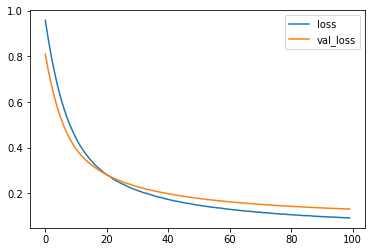

In [23]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

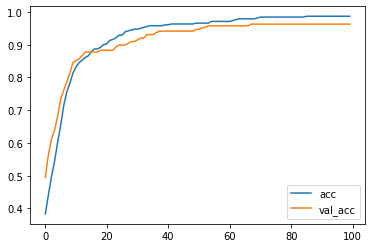

In [25]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()